In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Processing Data

In [2]:
collected_img = r'.\collectedimages' 
classes = os.listdir(collected_img)
num_classes = len(classes)

print(f'Classes : {classes}\nNum class : {num_classes}')

Classes : ['botolkaca', 'botolplastik', 'kaleng', 'kardus', 'karet', 'kertas', 'plastik', 'sedotan']
Num class : 8


In [3]:
datagen = ImageDataGenerator(
                rotation_range=5,
                width_shift_range=0.2,
                height_shift_range=0.2,
                rescale=1/255.,
                # shear_range=0.2,
                # zoom_range=0.2,
                horizontal_flip=True,
                fill_mode='nearest',
                validation_split=0.2
                )

batch_size = 32

train_gene = datagen.flow_from_directory(
        collected_img,  
        target_size=(224, 224),  
        batch_size=batch_size,
        subset='training',
        # shuffle=False,
        classes=classes)

valid_gene = datagen.flow_from_directory(
        collected_img,
        target_size=(224, 224), 
        batch_size=batch_size, 
        subset='validation',
        # shuffle=False,
        classes=classes)

Found 2938 images belonging to 8 classes.
Found 729 images belonging to 8 classes.


### Lihat data

In [4]:
import matplotlib.pyplot as plt 

In [5]:
imgs, labels = next(train_gene)

def plotImg(img_arr, num_show, batch_size):
    fig, ax = plt.subplots(1, num_show if num_show <= batch_size else batch_size, figsize=(20, 20))
    axes = ax.flatten()

    for img, ax in zip(img_arr, axes):
        ax.imshow(img)
        ax.axis("off")
    
    plt.tight_layout()
    plt.show()

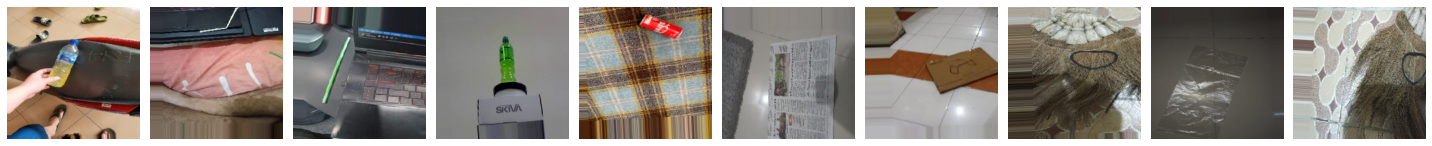

In [6]:
plotImg(imgs, 10, 32)

## Model Creation

In [7]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model

In [8]:
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# for layer in base_model.layers:
#     layer.trainable = False
trainable_break = 40
for layer in base_model.layers[:trainable_break]:
    # print(layer.name)
    layer.trainable=False
    
for layer in base_model.layers[trainable_break:]:
    layer.trainable=True

x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(1024,activation='relu')(x)
x = Dropout(.3)(x)

x = Dense(512,activation='relu')(x)
x = Dropout(.3)(x)

x = Dense(512,activation='relu')(x)

preds = Dense(num_classes, activation='sigmoid')(x)

model=Model(inputs=base_model.input, outputs=preds)

In [28]:
# def myprint(s):
#     with open('modelsummary.txt', 'w') as f:
#         model.summary(print_fn=lambda x: f.write(x + '\n'))
        
# model.summary(print_fn=myprint)

In [30]:
model.summary()

In [27]:
# from tensorflow.keras import backend as K

# def Recall(y_true, y_pred):
#     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#     possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
#     recall = true_positives / (possible_positives + K.epsilon())
#     return recall

# def Precision(y_true, y_pred):
#     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#     predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
#     precision = true_positives / (predicted_positives + K.epsilon())
#     return precision

# def F1Score(y_true, y_pred):
#     precision = Precision(y_true, y_pred)
#     recall = Recall(y_true, y_pred)
#     return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [28]:
model.compile(optimizer='adam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

In [29]:
history = model.fit(train_gene, 
                        epochs = 10, 
                        steps_per_epoch = train_gene.samples // batch_size,
                        validation_data = valid_gene, 
                        validation_steps = valid_gene.samples // batch_size)

Epoch 1/10
91/91 [==============================] - 37s 387ms/step - loss: 0.6629 - accuracy: 0.7839 - val_loss: 3.3332 - val_accuracy: 0.4134
Epoch 2/10
91/91 [==============================] - 36s 398ms/step - loss: 0.2965 - accuracy: 0.9105 - val_loss: 4.0545 - val_accuracy: 0.4062
Epoch 3/10
91/91 [==============================] - 37s 407ms/step - loss: 0.2088 - accuracy: 0.9391 - val_loss: 1.9635 - val_accuracy: 0.6392
Epoch 4/10
91/91 [==============================] - 35s 383ms/step - loss: 0.1938 - accuracy: 0.9487 - val_loss: 3.9296 - val_accuracy: 0.4517
Epoch 5/10
91/91 [==============================] - 35s 389ms/step - loss: 0.2118 - accuracy: 0.9425 - val_loss: 2.2961 - val_accuracy: 0.6264
Epoch 6/10
91/91 [==============================] - 35s 386ms/step - loss: 0.1652 - accuracy: 0.9556 - val_loss: 1.8389 - val_accuracy: 0.5881
Epoch 7/10
91/91 [==============================] - 35s 380ms/step - loss: 0.1616 - accuracy: 0.9591 - val_loss: 2.6454 - val_accuracy: 0.5199

In [31]:
import matplotlib.pyplot as plt

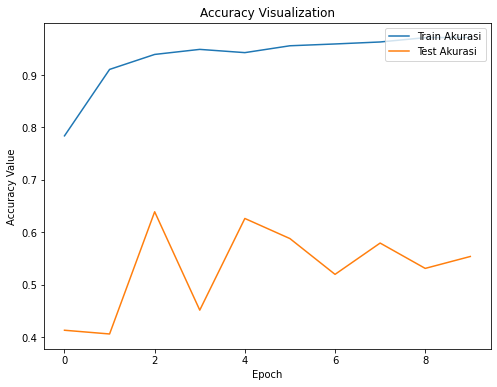

In [32]:
#@title Visualisasi Akurasi
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label="Train Akurasi")
plt.plot(history.history['val_accuracy'], label="Test Akurasi")
plt.title('Accuracy Visualization')
plt.ylabel('Accuracy Value')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

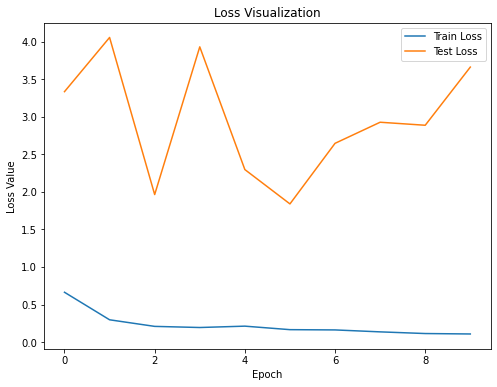

In [33]:
#@title Visualisasi Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Test Loss")
plt.title('Loss Visualization')
plt.ylabel('Loss Value')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

## Save Model 

In [ ]:
model.save('tensorflow_model_array/model')

In [ ]:
model.save('tensorflow_model_array/model.h5')

## Save Model to Base64

In [ ]:
def load_model():
    model_path = r'./tensorflow_model_array/model.h5'

    model = tf.keras.models.load_model(model_path)

    # model.summary()

    def decode_jpeg(x):
        x = tf.io.decode_base64(x)
        x =tf.image.resize(tf.image.decode_jpeg(x, channels=3), [224, 224])
        x = tf.reshape(x, [224, 224, 3])
        return x

    @tf.function()
    def serve_predict(input):
        
        model_base64_input = tf.map_fn(lambda x: decode_jpeg(x), input, fn_output_signature=tf.float32)
        pixels = model_base64_input

        input = {
            'input_1': pixels,
        }

        prediction = model(input)
        return prediction

    serve_predict = serve_predict.get_concrete_function(input=tf.TensorSpec([None, ], dtype=tf.string))

    tf.saved_model.save(
        model,
        'tensorflow_model_b64',
        signatures=serve_predict
    )
    pass

In [ ]:
load_model()

## Test base64

In [ ]:
# from tensorflow.keras.models import load_model
# import base64

In [ ]:
# model_loaded = load_model(r'.\tensorflow_model_b64')

# IMG_PATH_RANDOM = r'.\collectedimages\karet\20220519_183413.jpg'

# with open(IMG_PATH_RANDOM, "rb") as image_file:
#     encoded_string = base64.b64encode(image_file.read())

In [ ]:
# np.array([encoded_string]).shape

In [ ]:
# model_loaded.predict(encoded_string)